-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 20, constraints m = 2
          nnz(P) + nnz(A) = 60
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1  0.0000e+000  1.00e+000  1.00e+002  1.00e-001  4.05e-005s
  25  2.6450e-002  2.93e-004  4.74e-004  1.00e-001  4.72e-005s

status:               solved
number of iter

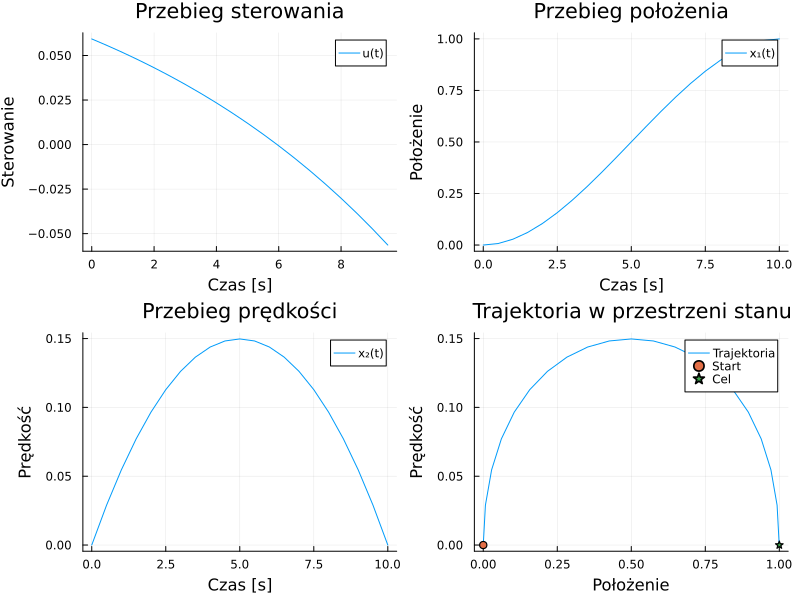

In [3]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)
@variable(model, μ[1:N])
@objective(model, Min, μ' * μ)
@constraint(model, R * μ .== xf - A^N * x0)
optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 20, constraints m = 42
          nnz(P) + nnz(A) = 138
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1  0.0000e+000  1.00e+000  1.00e+002  1.00e-001  4.60e-005s
 100  4.8821e-002  1.77e-003  6.74e-004  5.34e-001  9.29e-005s

status:               solved
number of it

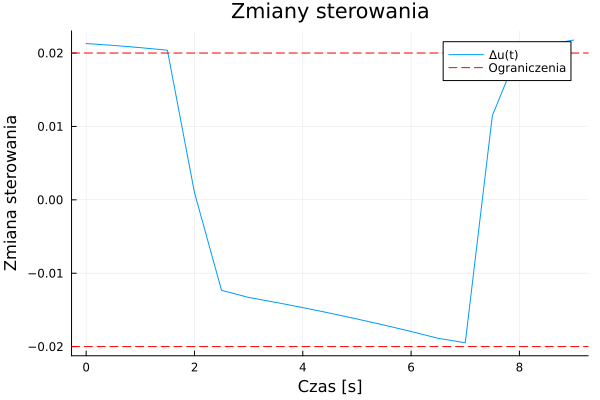

In [4]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu (takie same jak w Zadaniu 1)
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Macierz D dla ograniczeń na szybkość zmian sterowania
D = zeros(N - 1, N)
for i in 1:N-1
  D[i, i] = -1
  D[i, i+1] = 1
end

# Rozwiązanie problemu optymalizacji z dodatkowymi ograniczeniami
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])

# Funkcja celu - minimalizacja energii
@objective(model, Min, μ' * μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Nowe ograniczenia:
# 1. Pierwsze i ostatnie sterowanie równe 0
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

# 2. Ograniczenie na szybkość zmian sterowania
@constraint(model, D * μ .<= 0.02)
@constraint(model, D * μ .>= -0.02)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Dodatkowy wykres pokazujący zmiany sterowania
Δu = diff(u_opt)
p5 = plot(t_u[1:end-1], Δu, label="Δu(t)", xlabel="Czas [s]", ylabel="Zmiana sterowania",
  title="Zmiany sterowania", legend=:topright)
hline!([0.02, -0.02], label="Ograniczenia", linestyle=:dash, color=:red)

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 20, constraints m = 23
          nnz(P) + nnz(A) = 100
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1  0.0000e+000  1.00e+000  1.00e+002  1.00e-001  3.30e-005s
  75  4.8919e-002  1.68e-003  4.75e-004  6.57e-001  5.95e-005s

status:               solved
number of it

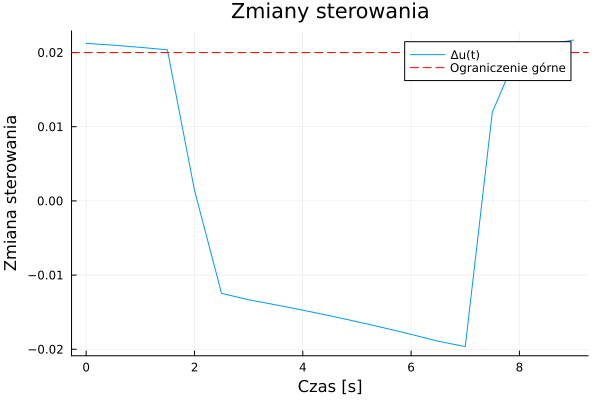

In [6]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Macierz D dla ograniczeń na szybkość zmian sterowania
D = zeros(N - 1, N)
for i in 1:N-1
  D[i, i] = -1
  D[i, i+1] = 1
end

# Rozwiązanie problemu optymalizacji z dodatkowymi ograniczeniami
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])

# Funkcja celu - minimalizacja energii
@objective(model, Min, μ' * μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Nowe ograniczenia:
# 1. Pierwsze i ostatnie sterowanie równe 0
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

# 2. Ograniczenie na szybkość zmian sterowania (tylko górne)
@constraint(model, D * μ .<= 0.02)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Dodatkowy wykres pokazujący zmiany sterowania
Δu = diff(u_opt)
p5 = plot(t_u[1:end-1], Δu, label="Δu(t)", xlabel="Czas [s]", ylabel="Zmiana sterowania",
  title="Zmiany sterowania", legend=:topright)
hline!([0.02], label="Ograniczenie górne", linestyle=:dash, color=:red)

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 20, constraints m = 4
          nnz(P) + nnz(A) = 62
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1  0.0000e+000  1.00e+000  1.00e+002  1.00e-001  2.85e-005s
  25  3.5680e-002  2.89e-004  4.74e-004  1.00e-001  3.49e-005s

status:               solved
number of iter

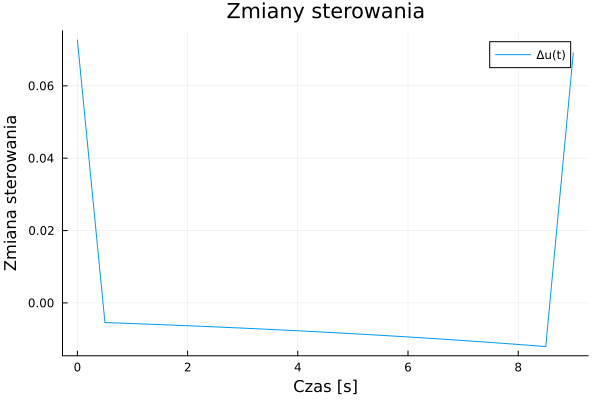

In [7]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])

# Funkcja celu - minimalizacja energii
@objective(model, Min, μ' * μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Ograniczenia na pierwsze i ostatnie sterowanie
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Dodatkowy wykres pokazujący zmiany sterowania
Δu = diff(u_opt)
p5 = plot(t_u[1:end-1], Δu, label="Δu(t)", xlabel="Czas [s]", ylabel="Zmiana sterowania",
  title="Zmiany sterowania", legend=:topright)

In [8]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])
@variable(model, z[1:N])  # zmienne pomocnicze do normy L1

# Funkcja celu - minimalizacja wydatku (norma L1)
@objective(model, Min, sum(z))

# Ograniczenia dla normy L1
@constraint(model, z .>= μ)
@constraint(model, z .>= -μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Wyświetlenie sumy wartości bezwzględnych sterowania (wydatek)
println("Całkowity wydatek sterowania: ", sum(abs.(u_opt)))

Całkowity wydatek sterowania: 0.4619576745043558
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 40, constraints m = 42
          nnz(P) + nnz(A) = 120
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1 -1.6000e+002  8.00e+000  1.00e+002  1.00e-001  5.15e-005s
 125  4.5454e-001  5.46e-004  1.87e-003  1.99e+000  1.32

In [10]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Macierz D dla ograniczeń na szybkość zmian sterowania
D = zeros(N - 1, N)
for i in 1:N-1
  D[i, i] = -1
  D[i, i+1] = 1
end

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])
@variable(model, z[1:N])  # zmienne pomocnicze do normy L1

# Funkcja celu - minimalizacja wydatku (norma L1)
@objective(model, Min, sum(z))

# Ograniczenia dla normy L1
@constraint(model, z .>= μ)
@constraint(model, z .>= -μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Ograniczenia na pierwsze i ostatnie sterowanie
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

# Ograniczenia na zmiany sterowania
@constraint(model, D * μ .<= 0.02)
@constraint(model, D * μ .>= -0.02)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Dodatkowy wykres pokazujący zmiany sterowania
Δu = diff(u_opt)
p5 = plot(t_u[1:end-1], Δu, label="Δu(t)", xlabel="Czas [s]", ylabel="Zmiana sterowania",
  title="Zmiany sterowania", legend=:topright)
hline!([0.02, -0.02], label="Ograniczenia", linestyle=:dash, color=:red)

# Wyświetlenie sumy wartości bezwzględnych sterowania (wydatek)
println("Całkowity wydatek sterowania: ", sum(abs.(u_opt)))

Całkowity wydatek sterowania: 0.8169115704600866
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 40, constraints m = 82
          nnz(P) + nnz(A) = 198
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1 -1.6000e+002  8.00e+000  1.00e+002  1.00e-001  5.80e-005s
 200  8.1623e-001  8.99e-004  1.07e-003  1.82e+000  2.17

In [11]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Macierz D dla ograniczeń na szybkość zmian sterowania
D = zeros(N - 1, N)
for i in 1:N-1
  D[i, i] = -1
  D[i, i+1] = 1
end

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])
@variable(model, z[1:N])  # zmienne pomocnicze do normy L1

# Funkcja celu - minimalizacja wydatku (norma L1)
@objective(model, Min, sum(z))

# Ograniczenia dla normy L1
@constraint(model, z .>= μ)
@constraint(model, z .>= -μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Ograniczenia na pierwsze i ostatnie sterowanie
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

# Ograniczenie na zmiany sterowania (tylko górne)
@constraint(model, D * μ .<= 0.02)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Dodatkowy wykres pokazujący zmiany sterowania
Δu = diff(u_opt)
p5 = plot(t_u[1:end-1], Δu, label="Δu(t)", xlabel="Czas [s]", ylabel="Zmiana sterowania",
  title="Zmiany sterowania", legend=:topright)
hline!([0.02], label="Ograniczenie górne", linestyle=:dash, color=:red)

# Wyświetlenie sumy wartości bezwzględnych sterowania (wydatek)
println("Całkowity wydatek sterowania: ", sum(abs.(u_opt)))

Całkowity wydatek sterowania: 0.7639999240010618
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 40, constraints m = 63
          nnz(P) + nnz(A) = 160
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1 -1.6000e+002  8.00e+000  1.00e+002  1.00e-001  4.44e-005s
 200  7.5751e-001  1.66e-003  2.17e-002  1.96e+000  1.65

In [13]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.5    # okres próbkowania [s]
tf = 10.0  # czas końcowy [s]
N = Int(tf / Δ)  # horyzont

# Stan początkowy i końcowy
x0 = [0.0; 0.0]
xf = [1.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Obliczenie macierzy R
function calculate_R(A, B, N)
  n = size(A, 1)
  R = zeros(n, N)
  for i in 1:N
    R[:, i] = A^(N - i) * B
  end
  return R
end

R = calculate_R(A, B, N)

# Rozwiązanie problemu optymalizacji
model = Model(OSQP.Optimizer)

# Zmienne decyzyjne
@variable(model, μ[1:N])
@variable(model, z[1:N])  # zmienne pomocnicze do normy L1

# Funkcja celu - minimalizacja wydatku (norma L1)
@objective(model, Min, sum(z))

# Ograniczenia dla normy L1
@constraint(model, z .>= μ)
@constraint(model, z .>= -μ)

# Ograniczenie na stan końcowy
@constraint(model, R * μ .== xf - A^N * x0)

# Ograniczenia na pierwsze i ostatnie sterowanie
@constraint(model, μ[1] == 0)
@constraint(model, μ[N] == 0)

optimize!(model)

# Pobranie optymalnego sterowania
u_opt = value.(μ)

# Symulacja układu dla optymalnego sterowania
function simulate_system(A, B, x0, u, N)
  n = size(A, 1)
  X = zeros(n, N + 1)
  X[:, 1] = x0

  for k in 1:N
    X[:, k+1] = A * X[:, k] + B * u[k]
  end

  return X
end

X = simulate_system(A, B, x0, u_opt, N)

# Tworzenie wykresów
t = 0:Δ:tf
t_u = 0:Δ:(tf-Δ)

# Wykres sterowania
p1 = plot(t_u, u_opt, label="u(t)", xlabel="Czas [s]", ylabel="Sterowanie",
  title="Przebieg sterowania", legend=:topright)

# Wykres położenia
p2 = plot(t, X[1, :], label="x₁(t)", xlabel="Czas [s]", ylabel="Położenie",
  title="Przebieg położenia", legend=:topright)

# Wykres prędkości
p3 = plot(t, X[2, :], label="x₂(t)", xlabel="Czas [s]", ylabel="Prędkość",
  title="Przebieg prędkości", legend=:topright)

# Wykres trajektorii w przestrzeni stanu
p4 = plot(X[1, :], X[2, :], label="Trajektoria", xlabel="Położenie", ylabel="Prędkość",
  title="Trajektoria w przestrzeni stanu", legend=:topright)
scatter!([x0[1]], [x0[2]], label="Start", marker=:circle)
scatter!([xf[1]], [xf[2]], label="Cel", marker=:star)

# Wyświetlenie wszystkich wykresów
plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))

# Wyświetlenie sumy wartości bezwzględnych sterowania (wydatek)
println("Całkowity wydatek sterowania: ", sum(abs.(u_opt)))

Całkowity wydatek sterowania: 0.49902704571184636
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 40, constraints m = 44
          nnz(P) + nnz(A) = 122
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1 -1.6000e+002  8.00e+000  1.00e+002  1.00e-001  3.85e-005s
 175  4.9830e-001  6.55e-005  1.81e-003  4.32e-001  1.2

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 302, constraints m = 202
          nnz(P) + nnz(A) = 802
settings: linear system solver = qdldl,
          eps_abs = 1.0e-003, eps_rel = 1.0e-003,
          eps_prim_inf = 1.0e-004, eps_dual_inf = 1.0e-004,
          rho = 1.00e-001 (adaptive),
          sigma = 1.00e-006, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter  objective    pri res    dua res    rho        time
   1 -3.2000e+001  1.13e-005  1.20e+000  1.00e-001  1.54e-004s
  25 -5.0000e+001  8.74e-009  5.69e-006  1.00e-001  2.31e-004s

status:               solved
number of 

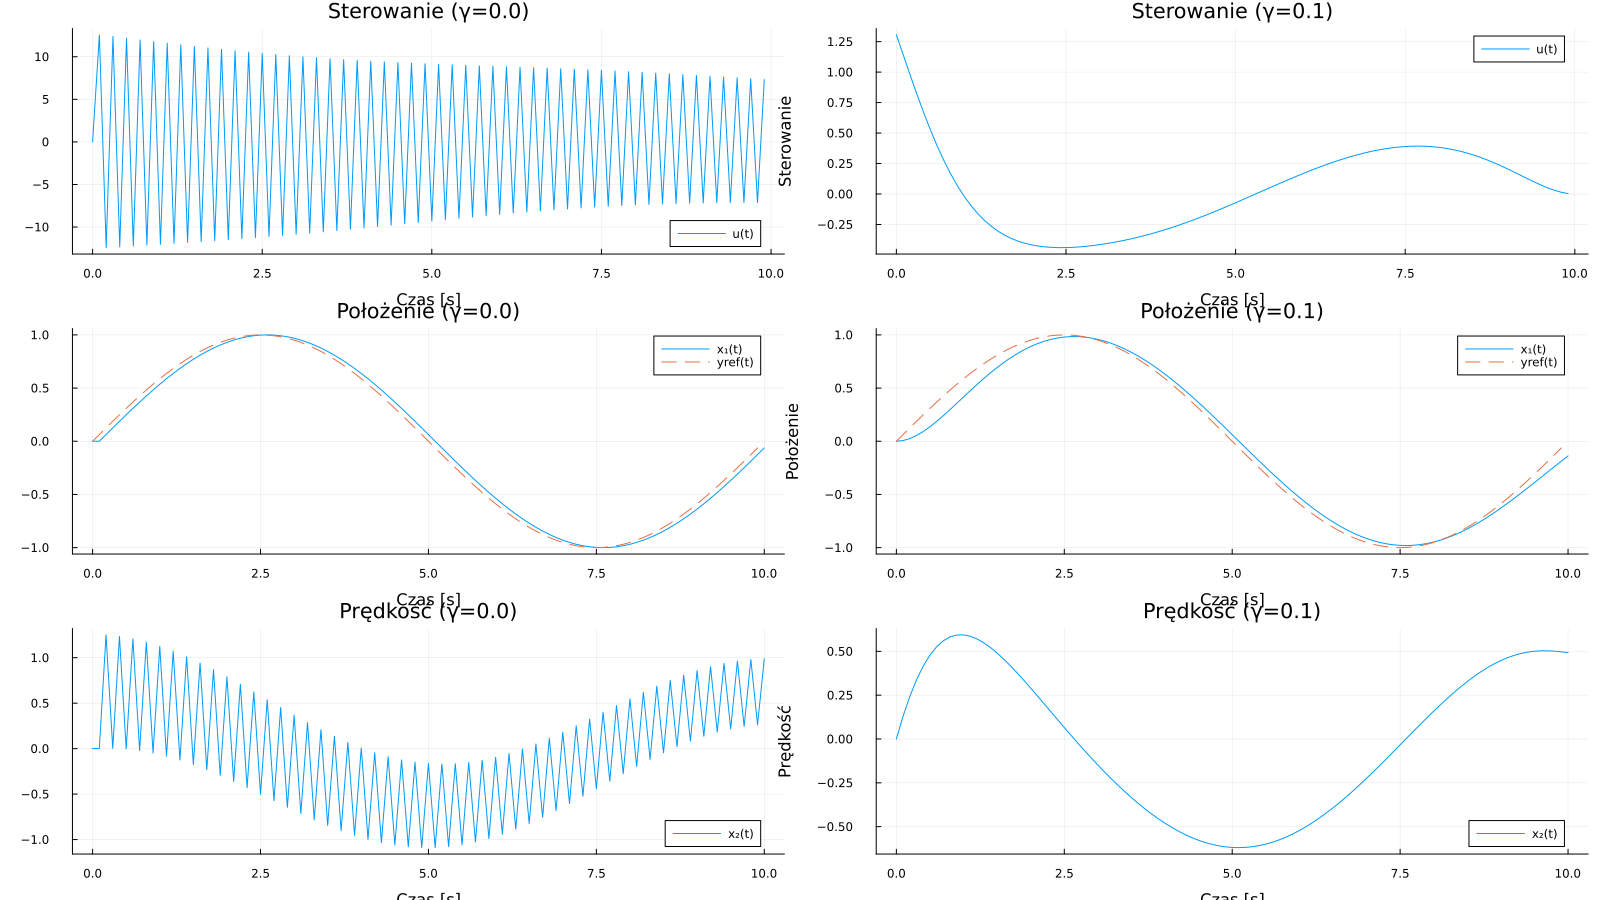

In [15]:
using LinearAlgebra
using Plots
using JuMP
using OSQP

# Parametry układu
m = 1.0    # masa [kg]
β = 0.1    # współczynnik tarcia [Ns/m]
Δ = 0.1    # okres próbkowania [s]
kf = 100   # horyzont
ω = 2π / 10  # częstotliwość sygnału referencyjnego

# Stan początkowy
x0 = [0.0; 0.0]

# Obliczenie macierzy układu ciągłego
α = -β / m
Ac = [0 1; 0 α]
Bc = [0; 1 / m]
C = [1 0]

# Obliczenie macierzy układu dyskretnego
A = [1 1/α*(exp(α * Δ)-1); 0 exp(α * Δ)]
B = -1 / β * [1 / α * (exp(α * Δ) - 1) - Δ; exp(α * Δ) - 1]

# Generacja trajektorii referencyjnej
t = 0:Δ:(kf*Δ)
yref = sin.(ω .* t[1:end-1])

# Funkcja do rozwiązania problemu optymalizacji
function solve_tracking_problem(γ)
  # Model optymalizacji
  model = Model(OSQP.Optimizer)

  # Zmienne decyzyjne
  @variable(model, u[1:kf])
  @variable(model, x[1:2, 1:kf+1])

  # Funkcja celu
  @objective(model, Min,
    sum((x[1, k+1] - yref[k])^2 for k in 1:kf) +
    γ * sum(u[k]^2 for k in 1:kf))

  # Ograniczenia
  @constraint(model, [j = 1:2], x[j, 1] == x0[j])

  # Dynamika układu
  for k in 1:kf
    @constraint(model, x[1, k+1] == A[1, 1] * x[1, k] + A[1, 2] * x[2, k] + B[1] * u[k])
    @constraint(model, x[2, k+1] == A[2, 1] * x[1, k] + A[2, 2] * x[2, k] + B[2] * u[k])
  end

  optimize!(model)
  return value.(u), value.(x)
end

# Rozwiązanie dla γ = 0
u_opt1, x_opt1 = solve_tracking_problem(0.0)

# Rozwiązanie dla γ = 0.1
u_opt2, x_opt2 = solve_tracking_problem(0.1)

# Tworzenie wykresów
function plot_results(u_opt, x_opt, γ)
  p1 = plot(t[1:end-1], u_opt, label="u(t)", xlabel="Czas [s]",
    ylabel="Sterowanie", title="Sterowanie (γ=$γ)")

  p2 = plot(t, x_opt[1, :], label="x₁(t)", xlabel="Czas [s]",
    ylabel="Położenie", title="Położenie (γ=$γ)")
  plot!(p2, t[1:end-1], yref, label="yref(t)", linestyle=:dash)

  p3 = plot(t, x_opt[2, :], label="x₂(t)", xlabel="Czas [s]",
    ylabel="Prędkość", title="Prędkość (γ=$γ)")

  plot(p1, p2, p3, layout=(3, 1), size=(800, 900))
end

# Wykresy dla obu przypadków
p1 = plot_results(u_opt1, x_opt1, 0.0)
p2 = plot_results(u_opt2, x_opt2, 0.1)
plot(p1, p2, layout=(1, 2), size=(1600, 900))